#Tutorial 2: Basics of Machine Learning

**By Guillermo Martin**

Welcome back! This week, we will cover the basics of Machine Learning. Our focus is on predicting diabetes, for which we will use the PIMA Indians Diabetes database and different machine learning models.

##Index
*   What is Machine Learning?
*   Predicting Diabetes
*   Decision Trees
*   Random Forests
*   Neural Networks


##What is Machine Learning?
 We can define it as a branch of Artificial Intelligence that focuses on models capable of 'learning' from training data, although the concept of 'learning' may vary depending on the specific algorithm used. Once our model has undergone training, which involves learning from the provided data, the next step is to test it with new data to determine its ability to make accurate predictions, classify data samples, or some other task. It's essential that the training and testing datasets are distinct. Testing the model with training data will almost always yield high testing accuracy, so it won't provide a good measure of how well the model generalizes to new, unseen data.

###Pandas and Sklearn
In this tutorial, we will make extensive use of the **pandas** and **sklearn** (scikit-learn) libraries. They contain many useful data structures and methods for data manipulation and analysis. We won't go into much detail about either library, but we encourage you to check out their respective documentations. We will learn a bit more about sklearn later. First let's import pandas:


In [ ]:
import pandas as pd #contains many data structures and functions for data
#analysis. Check https://pandas.pydata.org/docs/ to learn more about pandas data structures

##Predicting Diabetes with Pima Indians Diabetes Database
We are going to focus on **Pima Indians Diabetes Database**, from the National Institute of Diabetes and Digestive and Kidney Diseases. The dataset consists of diagnostic measurements such as BMI, glucose and blood pressure of several patients and a binary target variable that indicates whether a that patient has diabetes. We want to predict whether a patient has diabetes based on the diagnostic measurements. This is called a **classification** task.

First we will import the dataset from an url:

In [ ]:
#import dataset from url, which is in CSV format (comma-separated values)
column_names = ["pregnancies", "glucose", "bloodp", "skinthick", "insulin", "bmi", "diabetespedi", "age", "label"]
#we use column_names as parameter for names so that we can easily choose which columns we want later on
dataset = pd.read_csv(r"https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv", names=column_names, skiprows=1)
#check the first 5 rows
dataset.head()

,pregnancies,glucose,bloodp,skinthick,insulin,bmi,diabetespedi,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We skipped the first row as it is not necessary for our purposes, and could cause problems when training our model.

Now we divide our dataset into diagnostic measurements and label:

In [ ]:
#split dataset into the diagnostic measurement and label (target) variable
#we can easily do it with the column names that we previously defined
#and with .label indexing method
measures = ["pregnancies", "glucose", "bloodp", "skinthick", "insulin", "bmi", "diabetespedi", "age"]
X = dataset[measures]
y = dataset.label

Next, we randomly split our dataset into training and testing datasets. We use a **sklearn** method called train_test_split:

In [ ]:
#this will help us divide our dataset into training and testing datasets:
from sklearn.model_selection import train_test_split
#split (randomly) dataset into training and testing datasets
#30% of the dataset will be testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

We will use these training and testing datasets on different models and then compare how well they do!

##Decision Trees
Decision tree classifiers is a "tree-like" model of decisions. A good example is as follows:

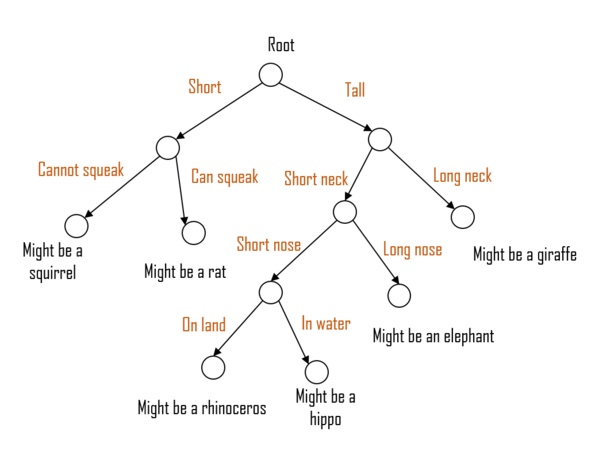

Even though conceptually it is a very simple model, it is very powerful for many classification tasks.

###A bit more about scikit-learn (sklearn)
Sklearn is one of the most widely used Machine Learning libraries of Python. Contains many methods for classification, regression, clustering, etc, so you don't need to hard code them from scratch! You can learn more on https://scikit-learn.org/stable/user_guide.html. Now we are going to use the decision tree classifier class, which can be imported as follows.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

###Training
Now we create a decision tree classifier object and train it with our training data. This can be done in two lines of code:

In [ ]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier()

###Testing
We are going to input new data into our model so that it makes a prediction:

In [ ]:
#make predictions
y_pred = decisiontree.predict(X_test)

We have to measure how well it does. One way is to compute the number of times the model correctly classifies the samples versus the total number of samples. accuracy_score does that for us:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7056277056277056


We get a a good accuracy, but can we do better? Let's try random forests next!

##Random Forests
Random forests are a type of **ensemble learning**, where we use several machine learning models and make a decision based on the average of the output of these models. In this case a random forest uses a **collection of decision trees**, each of which will make a decision as to whether they predict that a pacient has diabetes or not. The random forest classifier will predict that a patient has diabetes if most decision trees (>50%) agree.

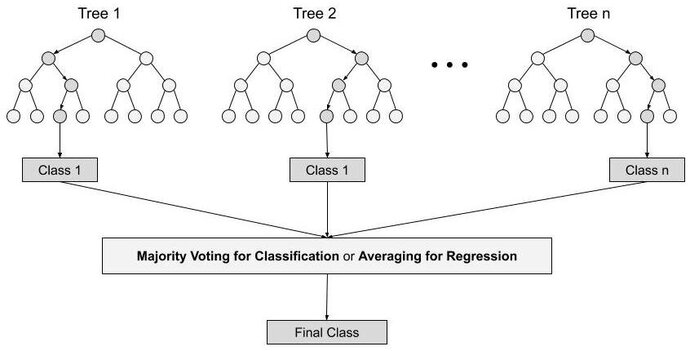

Let's have a go!

In [ ]:
from sklearn.ensemble import RandomForestClassifier #ensemble
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7748917748917749


Seems to do a better job!

##Support Vector Machines
Support Vector Machines (SVM) are very useful for classification. Intuitively, they divide the state space into 2 regions with a decision boundary, and then classify data based on which region they belong to.

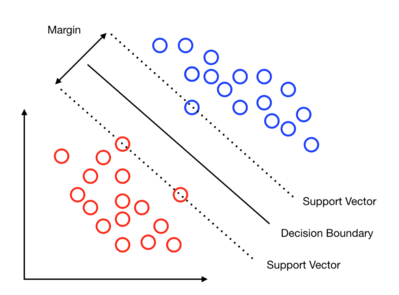

Note that there is a margin between "support vectors", on which the SVM are not be able to accurately classify the data.Let's check how well it does with our diabetes dataset.

In [ ]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7532467532467533


We see that its performance is similar to random forests.


##Conclusion
We have covered a number of ML models for our diabetes database:


*   **Decision trees**, which had an accuracy of ~ 67%, which is not great but better than nothing.
*   **Random forests**, which had an accuracy of ~79%, which is  better. Note that they are based on decision trees.
*   **Support Vector Machines**, which had an accuracy of ~75%, similar to random forests.

However, these are very rough estimates of how good our models are for a particular task. Next week we will delve a little deeper into how to properly assess our models!

##Exercise
There are many more models you can try with the Pima Indians Diabetes Database. Have a go at some of them! How do they compare?

You can learn about more models in sklearn in https://scikit-learn.org/stable/supervised_learning.html

##Image credits

https://forum.huawei.com/enterprise/en/machine-learning-algorithms-decision-trees/thread/710283-895

https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6
